<a href="https://colab.research.google.com/github/gianellannie/telecom-x/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [397]:
import requests

In [398]:
response = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

In [399]:
import pandas as pd

In [400]:
datos_normalizados = pd.json_normalize(response.json())
datos_normalizados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [401]:
columnas_relevantes = ['Churn','customer.gender','customer.SeniorCitizen','customer.Partner','customer.Dependents','customer.tenure','account.Contract',
                       'account.PaperlessBilling','account.PaymentMethod','account.Charges.Monthly','account.Charges.Total']
datos = datos_normalizados[columnas_relevantes]
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.9,267.4


In [402]:
pd.unique(datos['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [403]:
pd.unique(datos['customer.gender'])

array(['Female', 'Male'], dtype=object)

In [404]:
pd.unique(datos['customer.SeniorCitizen'])

array([0, 1])

In [405]:
pd.unique(datos['customer.Partner'])

array(['Yes', 'No'], dtype=object)

In [406]:
pd.unique(datos['customer.Dependents'])

array(['Yes', 'No'], dtype=object)

In [407]:
pd.unique(datos['customer.tenure'])

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [408]:
pd.unique(datos['account.Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [409]:
pd.unique(datos['account.PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [410]:
pd.unique(datos['account.PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [411]:
pd.unique(datos['account.Charges.Monthly'])

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [412]:
pd.unique(datos['account.Charges.Total'])

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [413]:
datos = datos.query('Churn != ""')
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.9,267.4


In [414]:
datos['customer.gender'] = datos['customer.gender'].apply(lambda x: 'Femenino' if x == 'Female' else 'Masculino')
datos.head()

/tmp/ipython-input-414-431638355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['customer.gender'] = datos['customer.gender'].apply(lambda x: 'Femenino' if x == 'Female' else 'Masculino')


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Femenino,0,Yes,Yes,9,One year,Yes,Mailed check,65.6,593.3
1,No,Masculino,0,No,No,9,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Masculino,0,No,No,4,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Masculino,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Femenino,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.9,267.4


In [415]:
datos['account.Contract'] = datos['account.Contract'].apply(lambda x: 'Un año' if x == 'One year' else 'Mes a mes' if x == 'Month-to-month' else 'Dos años' if x == 'Two year' else '')
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Femenino,0,Yes,Yes,9,Un año,Yes,Mailed check,65.6,593.3
1,No,Masculino,0,No,No,9,Mes a mes,No,Mailed check,59.9,542.4
2,Yes,Masculino,0,No,No,4,Mes a mes,Yes,Electronic check,73.9,280.85
3,Yes,Masculino,1,Yes,No,13,Mes a mes,Yes,Electronic check,98.0,1237.85
4,Yes,Femenino,1,Yes,No,3,Mes a mes,Yes,Mailed check,83.9,267.4


In [416]:
datos['account.PaymentMethod'] = datos['account.PaymentMethod'].apply(lambda x: 'Cheque por correo' if x == 'Mailed check' else 'Cheque electrónico' if x == 'Electronic check' else 'Tarjeta de crédito (automática)'
                                                                      if x == 'Credit card (automatic)' else 'Transferencia bancaria (automática)' if x == 'Bank transfer (automatic)' else '')
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Femenino,0,Yes,Yes,9,Un año,Yes,Cheque por correo,65.6,593.3
1,No,Masculino,0,No,No,9,Mes a mes,No,Cheque por correo,59.9,542.4
2,Yes,Masculino,0,No,No,4,Mes a mes,Yes,Cheque electrónico,73.9,280.85
3,Yes,Masculino,1,Yes,No,13,Mes a mes,Yes,Cheque electrónico,98.0,1237.85
4,Yes,Femenino,1,Yes,No,3,Mes a mes,Yes,Cheque por correo,83.9,267.4


In [417]:
datos['customer.SeniorCitizen'] = datos['customer.SeniorCitizen'].apply(lambda x: 'Sí' if x == 1 else 'No')
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Femenino,No,Yes,Yes,9,Un año,Yes,Cheque por correo,65.6,593.3
1,No,Masculino,No,No,No,9,Mes a mes,No,Cheque por correo,59.9,542.4
2,Yes,Masculino,No,No,No,4,Mes a mes,Yes,Cheque electrónico,73.9,280.85
3,Yes,Masculino,Sí,Yes,No,13,Mes a mes,Yes,Cheque electrónico,98.0,1237.85
4,Yes,Femenino,Sí,Yes,No,3,Mes a mes,Yes,Cheque por correo,83.9,267.4


In [418]:
import numpy as np

In [419]:
datos['account.Charges.Total'] = datos['account.Charges.Total'].replace(' ', '0.0').astype(np.float64)

In [420]:
columnas_respuestasCerradas = ['Churn','customer.Partner','customer.Dependents','account.PaperlessBilling']
datos[columnas_respuestasCerradas] = datos[columnas_respuestasCerradas].map(lambda x: 'Sí' if x == 'Yes' else 'No')
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Femenino,No,Sí,Sí,9,Un año,Sí,Cheque por correo,65.6,593.30
1,No,Masculino,No,No,No,9,Mes a mes,No,Cheque por correo,59.9,542.40
2,Sí,Masculino,No,No,No,4,Mes a mes,Sí,Cheque electrónico,73.9,280.85
3,Sí,Masculino,Sí,Sí,No,13,Mes a mes,Sí,Cheque electrónico,98.0,1237.85
4,Sí,Femenino,Sí,Sí,No,3,Mes a mes,Sí,Cheque por correo,83.9,267.40


In [421]:
datos.dtypes

,0
Churn,object
customer.gender,object
customer.SeniorCitizen,object
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
account.Contract,object
account.PaperlessBilling,object
account.PaymentMethod,object
account.Charges.Monthly,float64


In [422]:
datos['Cuentas_Diarias'] = datos['account.Charges.Monthly'] / 30
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,No,Femenino,No,Sí,Sí,9,Un año,Sí,Cheque por correo,65.6,593.30,2.186667
1,No,Masculino,No,No,No,9,Mes a mes,No,Cheque por correo,59.9,542.40,1.996667
2,Sí,Masculino,No,No,No,4,Mes a mes,Sí,Cheque electrónico,73.9,280.85,2.463333
3,Sí,Masculino,Sí,Sí,No,13,Mes a mes,Sí,Cheque electrónico,98.0,1237.85,3.266667
4,Sí,Femenino,Sí,Sí,No,3,Mes a mes,Sí,Cheque por correo,83.9,267.40,2.796667


In [423]:
datos = datos.rename(columns={'Churn':'Evasion_Cliente','customer.gender':'Genero','customer.SeniorCitizen':'Adulto_Mayor','customer.Partner':'Pareja',
                              'customer.Dependents':'Dependientes','customer.tenure':'Meses_Contrato','account.Contract':'Tipo_Contrato',
                              'account.PaperlessBilling':'Factura_Electronica','account.PaymentMethod':'Metodo_Pago','account.Charges.Monthly':'Facturacion_Mensual',
                              'account.Charges.Total':'Facturacion_Total'})
datos.head()

,Evasion_Cliente,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Facturacion_Mensual,Facturacion_Total,Cuentas_Diarias
0,No,Femenino,No,Sí,Sí,9,Un año,Sí,Cheque por correo,65.6,593.30,2.186667
1,No,Masculino,No,No,No,9,Mes a mes,No,Cheque por correo,59.9,542.40,1.996667
2,Sí,Masculino,No,No,No,4,Mes a mes,Sí,Cheque electrónico,73.9,280.85,2.463333
3,Sí,Masculino,Sí,Sí,No,13,Mes a mes,Sí,Cheque electrónico,98.0,1237.85,3.266667
4,Sí,Femenino,Sí,Sí,No,3,Mes a mes,Sí,Cheque por correo,83.9,267.40,2.796667


#📊 Carga y análisis

In [424]:
datos.describe(include='all')

,Evasion_Cliente,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Facturacion_Mensual,Facturacion_Total,Cuentas_Diarias
count,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043.000000,7043.000000,7043.000000
unique,2,2,2,2,2,NaN,3,2,4,NaN,NaN,NaN
top,No,Masculino,No,No,No,NaN,Mes a mes,Sí,Cheque electrónico,NaN,NaN,NaN
freq,5174,3555,5901,3641,4933,NaN,3875,4171,2365,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,64.761692,2279.734304,2.158723
std,NaN,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,30.090047,2266.794470,1.003002
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,18.250000,0.000000,0.608333
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,35.500000,398.550000,1.183333
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,70.350000,1394.550000,2.345000
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,89.850000,3786.600000,2.995000


In [29]:
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns

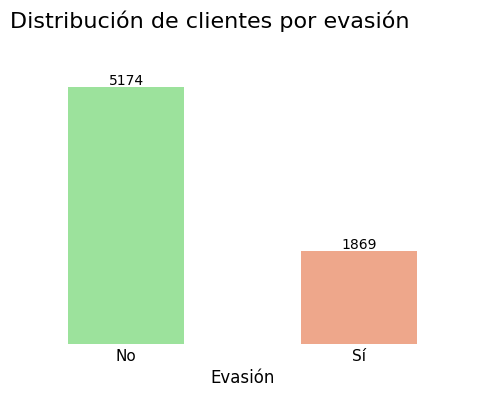

In [443]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
sns.countplot(x='Evasion_Cliente', data=datos, palette=['lightgreen', 'lightsalmon'], hue='Evasion_Cliente', legend=False, width=0.5)
ax.set_title('Distribución de clientes por evasión', fontsize=16, loc='left')
ax.set_xlabel('Evasión', fontsize=12)
ax.xaxis.set_tick_params(labelsize=11)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2, height+40, '{:.0f}'.format(height), color='black', fontsize=10, ha="center", va='baseline')
ax.set_ylim(0, max(datos['Evasion_Cliente'].value_counts())*1.2)
plt.show()

Basado en los datos iniciales, la empresa cuenta con un total de 7 043 clientes. De estos, 1 869 han cancelado el servicio, mientras que 5 174 permanecen activos. Esto representa una tasa de evasión general del 26.54%, un indicador clave que justifica la necesidad de acciones de retención.

In [289]:
datos_evasionCliente = datos.query('Evasion_Cliente == "Sí"')
datos_evasionCliente = datos_evasionCliente.drop(columns=['Evasion_Cliente'])
datos_evasionCliente.head()

,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Facturacion_Mensual,Facturacion_Total,Cuentas_Diarias
2,Masculino,No,No,No,4,Mes a mes,Sí,Cheque electrónico,73.9,280.85,2.463333
3,Masculino,Sí,Sí,No,13,Mes a mes,Sí,Cheque electrónico,98.0,1237.85,3.266667
4,Femenino,Sí,Sí,No,3,Mes a mes,Sí,Cheque por correo,83.9,267.40,2.796667
18,Masculino,Sí,No,No,45,Un año,No,Tarjeta de crédito (automática),62.7,2791.50,2.090000
19,Masculino,Sí,No,No,1,Mes a mes,Sí,Cheque electrónico,25.1,25.10,0.836667


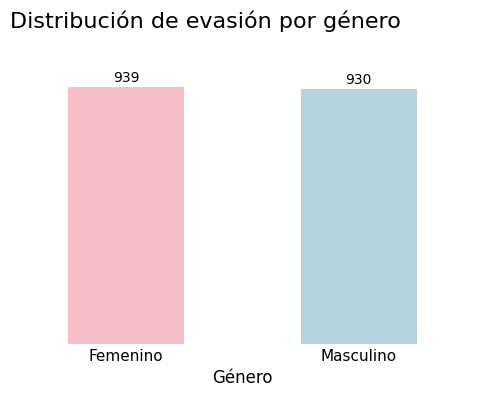

In [442]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
sns.countplot(x='Genero', data=datos_evasionCliente, palette=['lightblue', 'lightpink'], hue='Genero', width=0.5, order=datos_evasionCliente['Genero'].value_counts().index)
ax.set_title('Distribución de evasión por género', fontsize=16, loc='left')
ax.set_xlabel('Género', fontsize=12)
ax.xaxis.set_tick_params(labelsize=11)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2, height+20, '{:.0f}'.format(height), color='black', fontsize=10, ha="center", va='baseline')
ax.set_ylim(0, max(datos_evasionCliente['Genero'].value_counts())*1.2)
plt.show()

La evasión es casi idéntica entre géneros, con 939 clientas y 930 clientes que cancelaron el servicio. Esto sugiere que el género no es un factor determinante en la decisión de abandonar la empresa.

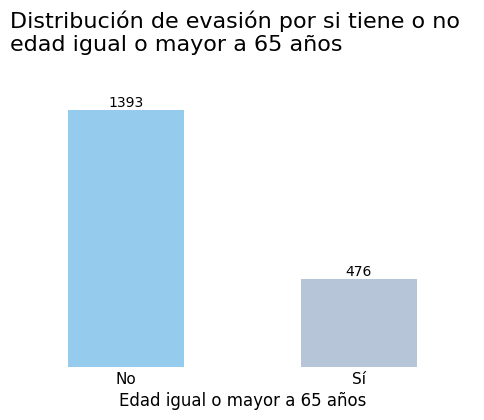

In [451]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
sns.countplot(x='Adulto_Mayor', data=datos_evasionCliente, palette=['lightskyblue','lightsteelblue'], hue='Adulto_Mayor', width=0.5)
ax.set_title('Distribución de evasión por si tiene o no\nedad igual o mayor a 65 años', fontsize=16, loc='left')
ax.set_xlabel('Edad igual o mayor a 65 años', fontsize=12)
ax.xaxis.set_tick_params(labelsize=11)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2, height+20, '{:.0f}'.format(height), color='black', fontsize=10, ha="center", va='baseline')
ax.set_ylim(0, max(datos_evasionCliente['Adulto_Mayor'].value_counts())*1.2)
plt.show()

Los clientes menores de 65 años tienen una tasa de evasión notablemente más alta. De los clientes que cancelaron, 476 son adultos mayores, mientras que 1 393 no lo son. El análisis de la tasa de evasión por segmento revela que aproximadamente el 74.53% de los clientes más jóvenes cancelan el servicio, en comparación con solo el 25.47% de los adultos mayores.

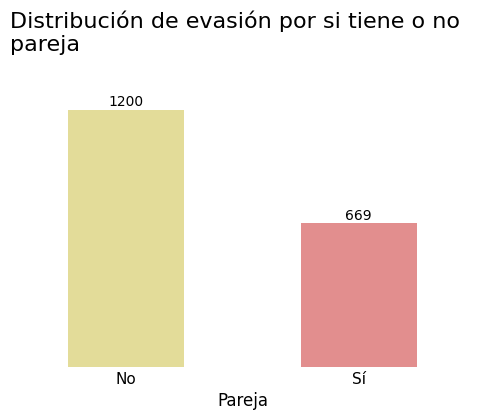

In [452]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
sns.countplot(x='Pareja', data=datos_evasionCliente, palette=['khaki','lightcoral'], hue='Pareja', width=0.5)
ax.set_title('Distribución de evasión por si tiene o no\npareja', fontsize=16, loc='left')
ax.set_xlabel('Pareja', fontsize=12)
ax.xaxis.set_tick_params(labelsize=11)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2, height+20, '{:.0f}'.format(height), color='black', fontsize=10, ha="center", va='baseline')
ax.set_ylim(0, max(datos_evasionCliente['Pareja'].value_counts())*1.2)
plt.show()

1 200 de los clientes que cancelaron no tenían pareja, frente a 669 que sí la tenían. La tasa de evasión para clientes sin pareja (64.21%) es mucho mayor que para aquellos con pareja (35.79%).

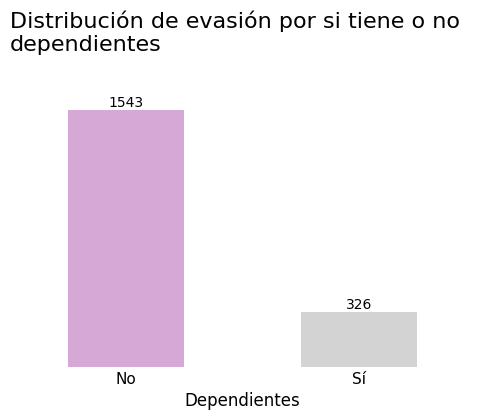

In [462]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
sns.countplot(x='Dependientes', data=datos_evasionCliente, palette=['plum','lightgray'], hue='Dependientes', width=0.5)
ax.set_title('Distribución de evasión por si tiene o no\ndependientes', fontsize=16, loc='left')
ax.set_xlabel('Dependientes', fontsize=12)
ax.xaxis.set_tick_params(labelsize=11)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2, height+20, '{:.0f}'.format(height), color='black', fontsize=10, ha="center", va='baseline')
ax.set_ylim(0, max(datos_evasionCliente['Dependientes'].value_counts())*1.2)
plt.show()

De manera similar, 1 543 de los que cancelaron no tenían dependientes, comparado con solo 326 que sí los tenían. La tasa de evasión para clientes sin dependientes (82.56%) supera a la de aquellos con dependientes (17.44%).

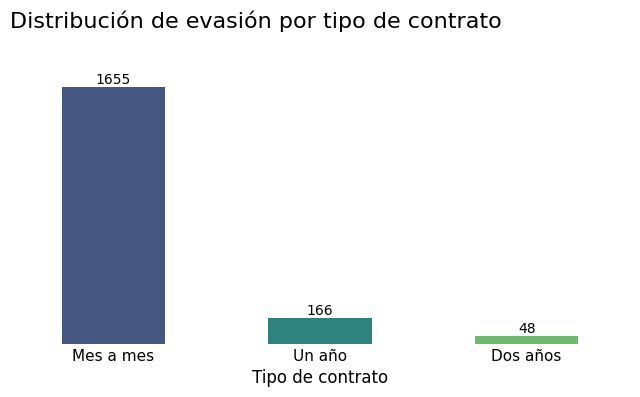

In [469]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
sns.countplot(x='Tipo_Contrato', data=datos_evasionCliente, palette='viridis', hue='Tipo_Contrato', width=0.5)
ax.set_title('Distribución de evasión por tipo de contrato', fontsize=16, loc='left')
ax.set_xlabel('Tipo de contrato', fontsize=12)
ax.xaxis.set_tick_params(labelsize=11)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2, height+20, '{:.0f}'.format(height), color='black', fontsize=10, ha="center", va='baseline')
ax.set_ylim(0, max(datos_evasionCliente['Tipo_Contrato'].value_counts())*1.2)
plt.show()

Este es uno de los factores más influyentes. La abrumadora mayoría de los clientes que cancelan (1 655 de 1 869) tenían un contrato mes a mes. En contraste, solo 166 clientes con contrato de un año y 48 con contrato de dos años cancelaron.

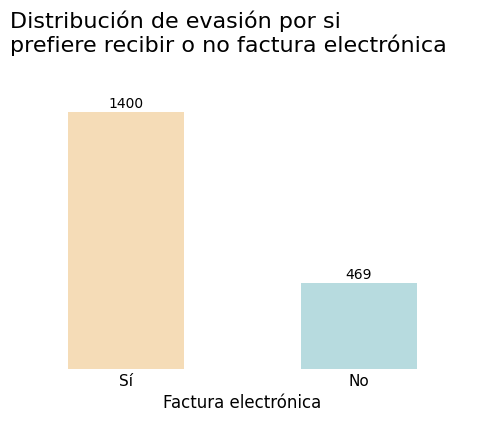

In [467]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
sns.countplot(x='Factura_Electronica', data=datos_evasionCliente, palette=['navajowhite','powderblue'], hue='Factura_Electronica', width=0.5)
ax.set_title('Distribución de evasión por si\nprefiere recibir o no factura electrónica', fontsize=16, loc='left')
ax.set_xlabel('Factura electrónica', fontsize=12)
ax.xaxis.set_tick_params(labelsize=11)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2, height+20, '{:.0f}'.format(height), color='black', fontsize=10, ha="center", va='baseline')
ax.set_ylim(0, max(datos_evasionCliente['Factura_Electronica'].value_counts())*1.2)
plt.show()

Sorprendentemente, los clientes que optan por la factura electrónica tienen una tasa de evasión más alta (74.91%) que los que no la usan (25.09%).

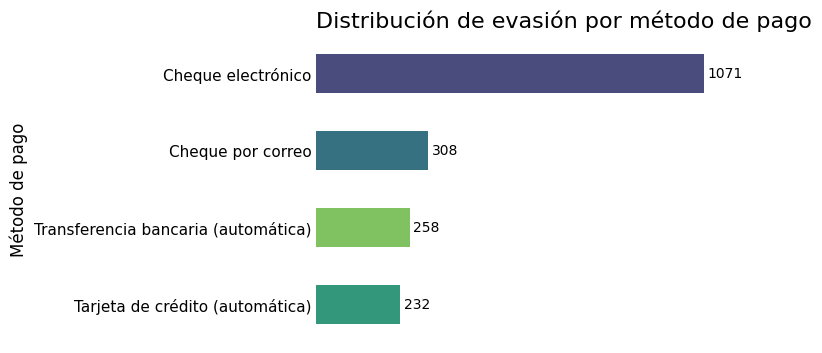

In [491]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y', which='both', size=0)
sns.countplot(y='Metodo_Pago', data=datos_evasionCliente, palette='viridis', hue='Metodo_Pago', width=0.5, order=datos_evasionCliente['Metodo_Pago'].value_counts().index)
ax.set_title('Distribución de evasión por método de pago', fontsize=16, loc='left')
ax.set_ylabel('Método de pago', fontsize=12)
ax.yaxis.set_tick_params(labelsize=11)
for p in ax.patches:
  width = p.get_width()
  if width == 0: continue
  ax.text(width+10, p.get_y()+p.get_height()/2, '{:.0f}'.format(width), color='black', fontsize=10, ha="left", va='center')
ax.set_xlim(0, max(datos_evasionCliente['Metodo_Pago'].value_counts())*1.2)
plt.show()

El método de pago también muestra una clara diferencia. El cheque electrónico es el método preferido por más de la mitad de los clientes que cancelaron (1 071 de 1 869). Su tasa de evasión es del 57.3%. En cambio, los métodos de pago automáticos como la transferencia bancaria y la tarjeta de crédito tienen cifras de evasión mucho menores.

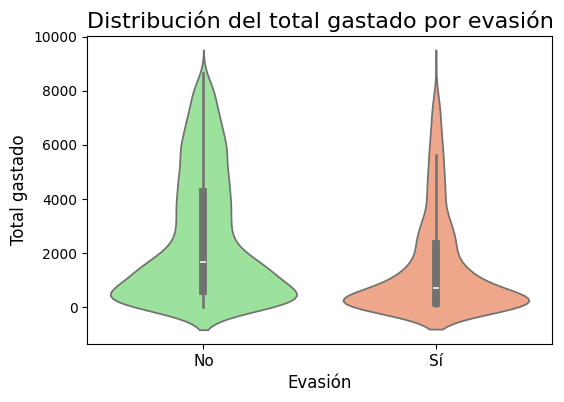

In [486]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Evasion_Cliente', y='Facturacion_Total', data=datos, palette=['lightgreen', 'lightsalmon'], hue='Evasion_Cliente', legend=False)
plt.title('Distribución del total gastado por evasión', fontsize=16, loc='left')
plt.ylabel('Total gastado', fontsize=12)
plt.xlabel('Evasión', fontsize=12)
plt.xticks(fontsize=11)
plt.show()

Se muestra que los clientes que cancelan ("Sí") tienden a tener un gasto total acumulado mucho menor que los que se quedan ("No"). La mediana del gasto para los que cancelan es muy baja.

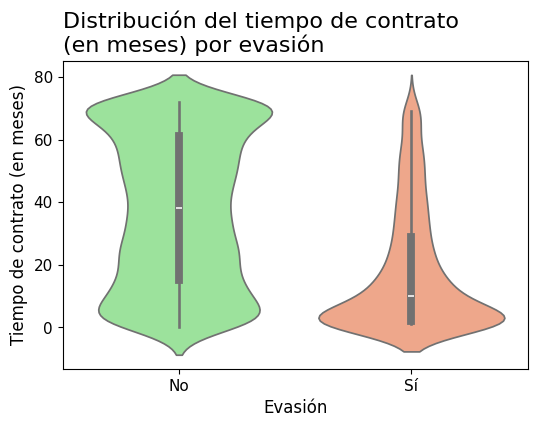

In [487]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Evasion_Cliente', y='Meses_Contrato', data=datos, palette=['lightgreen', 'lightsalmon'], hue='Evasion_Cliente', legend=False)
plt.title('Distribución del tiempo de contrato\n(en meses) por evasión', fontsize=16, loc='left')
plt.ylabel('Tiempo de contrato (en meses)', fontsize=12)
plt.yticks(fontsize=11)
plt.xlabel('Evasión', fontsize=12)
plt.xticks(fontsize=11)
plt.show()

La distribución para los clientes que cancelan ("Sí") está fuertemente concentrada en los primeros meses de servicio. En cambio, los clientes que no cancelan ("No") muestran una distribución mucho más amplia, con una antigüedad considerablemente mayor.

#📄Informe final